# Task-1 Stock Prediction

## BHARAT INTERN TASK

## Dikshant Sharma

## Task - Take stock price of any company you want and predicts its price by using LSTM.


## STEPS INVOLVED :- 

###  1. Import necessary libraries . 


###  2. Load the stock price data

###  3. Gathering Insights



### 4. Preprocess the data

###  5. Build and train the LSTM model

### 6. Visualizing Actual vs Predicted Data

### 7. Make predictions using the trained model


#  STEP 1:  Importing necessary  libraries

In [209]:
#importing libraries to be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns # data visualization 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #ignore warnings

from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

# STEP 2: Load the stock price data

In [231]:
#LOAD CSV FILE 
df = pd.read_csv("D:\S\google.csv")
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0,1
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0,1
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0,1
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0,1
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0,1
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0,1
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0,1
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0,1


In [169]:
df.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0,1
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0,1
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0,1
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0,1
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0,1
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634,695.94,702.77,692.0100,698.40,1465634,0,1
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318,697.46,700.86,693.0819,699.06,1184318,0,1
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415,701.87,701.95,687.0000,697.45,2171415,0,1
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022,675.22,689.40,673.4500,675.17,4449022,0,1
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085,668.26,672.30,663.2840,671.00,2641085,0,1




# STEP 3: Gathering Insights

In [170]:
print("Shape of data:",df.shape)

Shape of data: (1258, 14)


In [171]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   int64  
 13  splitFactor  1258 non-null   int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 137.7+ KB


In [173]:
df = df.assign(date=lambda x: pd.to_datetime(x['date'].str.split().str[0])).set_index('date')[['open', 'close']]
print(df.head(10))

              open   close
date                      
2016-06-14  716.48  718.27
2016-06-15  719.00  718.92
2016-06-16  714.91  710.36
2016-06-17  708.65  691.72
2016-06-20  698.77  693.71
2016-06-21  698.40  695.94
2016-06-22  699.06  697.46
2016-06-23  697.45  701.87
2016-06-24  675.17  675.22
2016-06-27  671.00  668.26


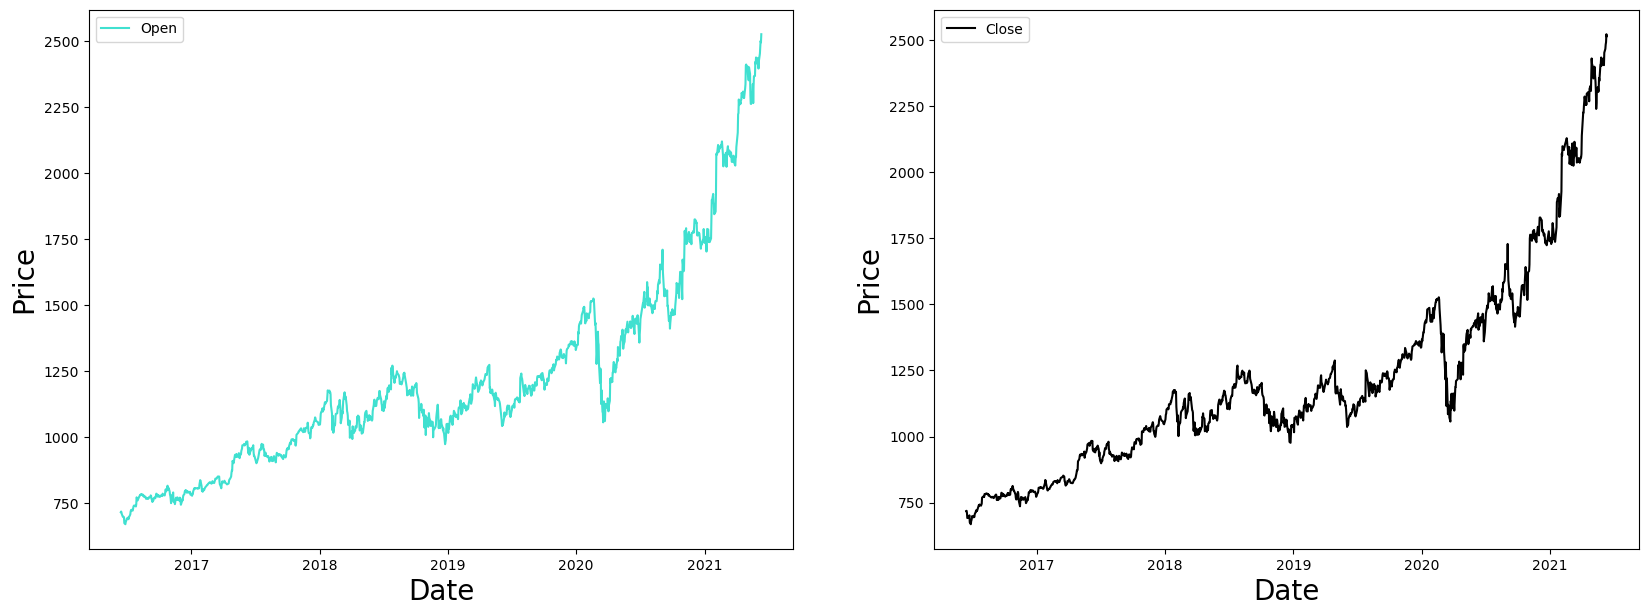

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(df['open'], label='Open', color='turquoise')

ax[0].set_xlabel('Date', size=20)
ax[0].set_ylabel('Price', size=20)
ax[0].legend()

ax[1].plot(df['close'], label='Close', color='black')

ax[1].set_xlabel('Date', size=20)
ax[1].set_ylabel('Price', size=20)
ax[1].legend()

plt.show()




#  STEP 4: Preprocess The Data


In [175]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaled_df = df.copy()
 
    
MMS = MinMaxScaler()
scaled_df[df.columns] = MMS.fit_transform(df)

# Display the first  30 rows of the scaled DataFrame
scaled_df.head(30)



,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [182]:

# Split the data into training and testing sets
training_size = round(len(df) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [183]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

In [184]:
import numpy as np

def create_sequences(dataset, seq_length):
    sequences = []
    labels = []

    start_idx = 0

    for stop_idx in range(seq_length, len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences), np.array(labels))


In [185]:

seq_length = 50

train_seq, train_label = create_sequences(train_data, seq_length)


test_seq, test_label = create_sequences(test_data, seq_length)


print("Train sequences shape:", train_seq.shape)
print("Train labels shape:", train_label.shape)
print("Test sequences shape:", test_seq.shape)
print("Test labels shape:", test_label.shape)



Train sequences shape: (956, 50, 2)
Train labels shape: (956, 2)
Test sequences shape: (202, 50, 2)
Test labels shape: (202, 2)


# STEP 5: Build  LSTM model

In [186]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50, 50)            10600     
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
30/30 [==============================] - 7s 78ms/step - loss: 1188278.8750 - mean_absolute_error: 1074.8013 - val_loss: 3756768.0000 - val_mean_absolute_error: 1913.9502
Epoch 2/100
30/30 [==============================] - 1s 39ms/step - loss: 1178479.5000 - mean_absolute_error: 1070.2371 - val_loss: 3743291.0000 - val_mean_absolute_error: 1910.4260
Epoch 3/100
30/30 [==============================] - 1s 44ms/step - loss: 1172578.3750 - mean_absolute_error: 1067.4723 - val_loss: 3734908.0000 - val_mean_absolute_error: 1908.2307
Epoch 4/100
30/30 [==============================] - 1s 41ms/step - loss: 1168310.6250 - mean_absolute_error: 1065.4689 - val_loss: 3727765.7500 - val_mean_absolute_error: 1906.3583
Epoch 5/100
30/30 [==============================] - 1s 39ms/step - loss: 1164455.0000 - mean_absolute_error: 1063.6597 - val_loss: 3721052.0000 - val_mean_absolute_error: 1904.5966
Epoch 6/100
30/30 [==============================] - 1s 40ms/step - loss: 1160769.8750 - m

Epoch 46/100
30/30 [==============================] - 1s 35ms/step - loss: 1033352.5000 - mean_absolute_error: 1000.1364 - val_loss: 3483608.7500 - val_mean_absolute_error: 1841.2074
Epoch 47/100
30/30 [==============================] - 1s 35ms/step - loss: 1030358.8750 - mean_absolute_error: 998.6417 - val_loss: 3478098.7500 - val_mean_absolute_error: 1839.7104
Epoch 48/100
30/30 [==============================] - 1s 28ms/step - loss: 1027373.3125 - mean_absolute_error: 997.1400 - val_loss: 3472572.5000 - val_mean_absolute_error: 1838.2079
Epoch 49/100
30/30 [==============================] - 1s 30ms/step - loss: 1024383.2500 - mean_absolute_error: 995.6451 - val_loss: 3467096.5000 - val_mean_absolute_error: 1836.7180
Epoch 50/100
30/30 [==============================] - 1s 30ms/step - loss: 1021412.0000 - mean_absolute_error: 994.1500 - val_loss: 3461595.5000 - val_mean_absolute_error: 1835.2197
Epoch 51/100
30/30 [==============================] - 1s 29ms/step - loss: 1018439.6875 -

30/30 [==============================] - 1s 39ms/step - loss: 904407.8125 - mean_absolute_error: 933.4512 - val_loss: 3242541.5000 - val_mean_absolute_error: 1774.5360
Epoch 92/100
30/30 [==============================] - 1s 42ms/step - loss: 901670.5625 - mean_absolute_error: 931.9819 - val_loss: 3237327.2500 - val_mean_absolute_error: 1773.0660
Epoch 93/100
30/30 [==============================] - 1s 34ms/step - loss: 898936.8750 - mean_absolute_error: 930.5126 - val_loss: 3232121.0000 - val_mean_absolute_error: 1771.5973
Epoch 94/100
30/30 [==============================] - 1s 39ms/step - loss: 896208.8125 - mean_absolute_error: 929.0437 - val_loss: 3226922.2500 - val_mean_absolute_error: 1770.1293
Epoch 95/100
30/30 [==============================] - 1s 41ms/step - loss: 893481.8125 - mean_absolute_error: 927.5820 - val_loss: 3221747.7500 - val_mean_absolute_error: 1768.6672
Epoch 96/100
30/30 [==============================] - 1s 33ms/step - loss: 890764.5625 - mean_absolute_error

In [188]:
# Make predictions on the test data
test_predictions = model.predict(test_seq)

# Display the first 10 predicted values
print(test_predictions[:10])


7/7 [==============================] - 1s 12ms/step
[[158.87663 157.91982]
 [158.87663 157.91982]
 [158.87663 157.91982]
 [158.87663 157.91982]
 [158.87663 157.91982]
 [158.87663 157.91982]
 [158.87663 157.91982]
 [158.87663 157.91982]
 [158.87663 157.91982]
 [158.87663 157.91982]]


In [190]:

# Inverse transform the predicted data to get the original scale

test_inverse_predicted = MMS.inverse_transform(test_predictions)

print(test_inverse_predicted[:10])


[[295215.56 293347.38]
 [295215.56 293347.38]
 [295215.56 293347.38]
 [295215.56 293347.38]
 [295215.56 293347.38]
 [295215.56 293347.38]
 [295215.56 293347.38]
 [295215.56 293347.38]
 [295215.56 293347.38]
 [295215.56 293347.38]]


# STEP 5: Visualizing Actual vs Predicted Data

In [192]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-202:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-202:].index)], axis=1)


In [193]:
# Inversing normalization/scaling 
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,2.955782e+06,2.944143e+06,295215.5625,293347.375
2020-08-25,2.933702e+06,2.981247e+06,295215.5625,293347.375
2020-08-26,2.981774e+06,3.063090e+06,295215.5625,293347.375
2020-08-27,3.066461e+06,3.029637e+06,295215.5625,293347.375
2020-08-28,3.029031e+06,3.048319e+06,295215.5625,293347.375


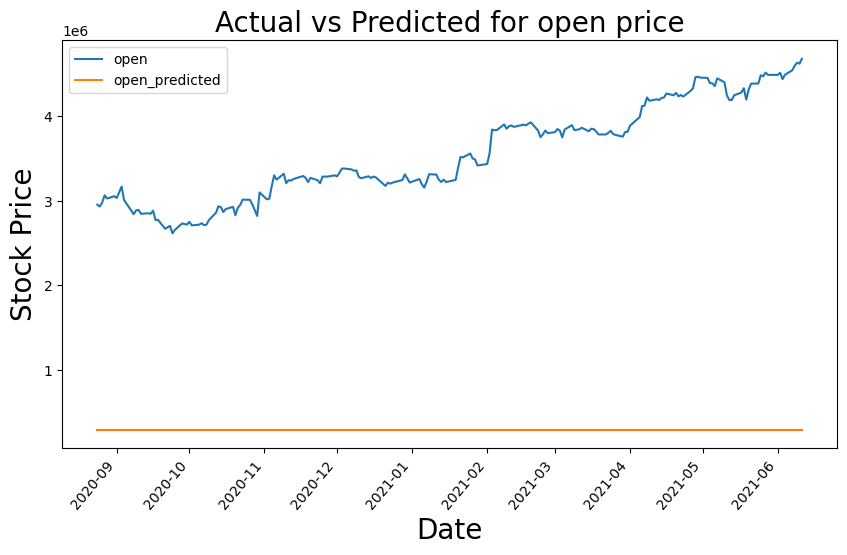

In [194]:
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=50)
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Actual vs Predicted for open price',size=20)
plt.show()

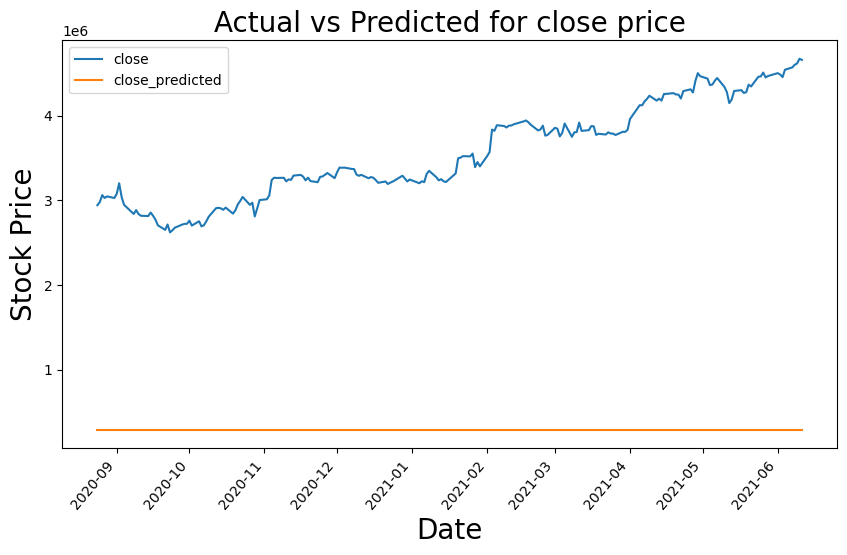

In [195]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=50)
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Actual vs Predicted for close price',size=20)
plt.show()

In [196]:
df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,4.634544e+06,4.618080e+06,295215.5625,293347.375
2021-06-10,4.624366e+06,4.674050e+06,295215.5625,293347.375
2021-06-11,4.681671e+06,4.659835e+06,295215.5625,293347.375
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [197]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [198]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

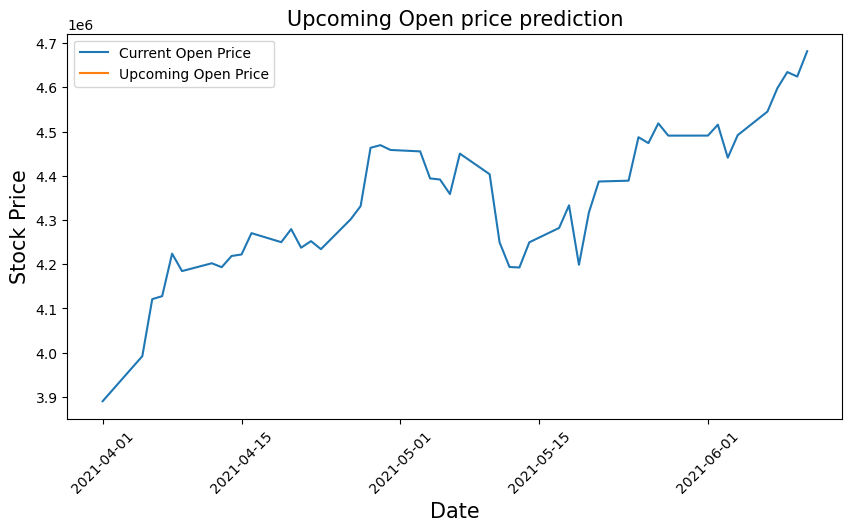

In [199]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

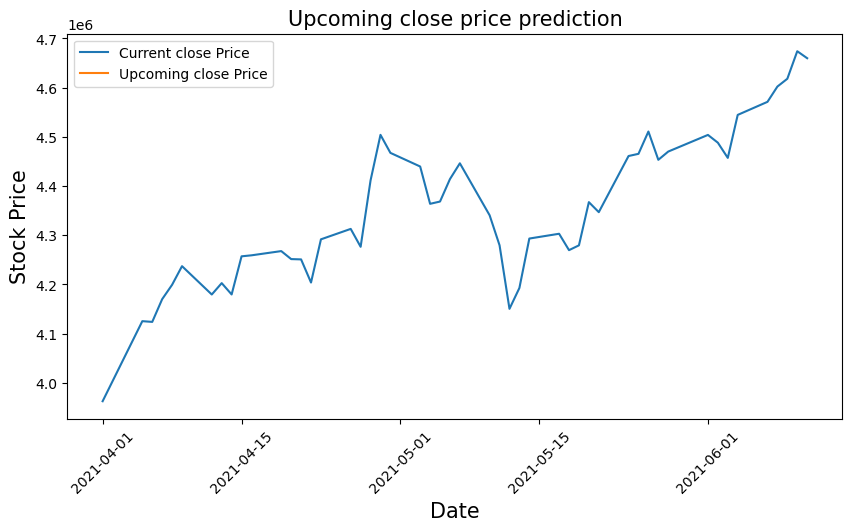

In [200]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

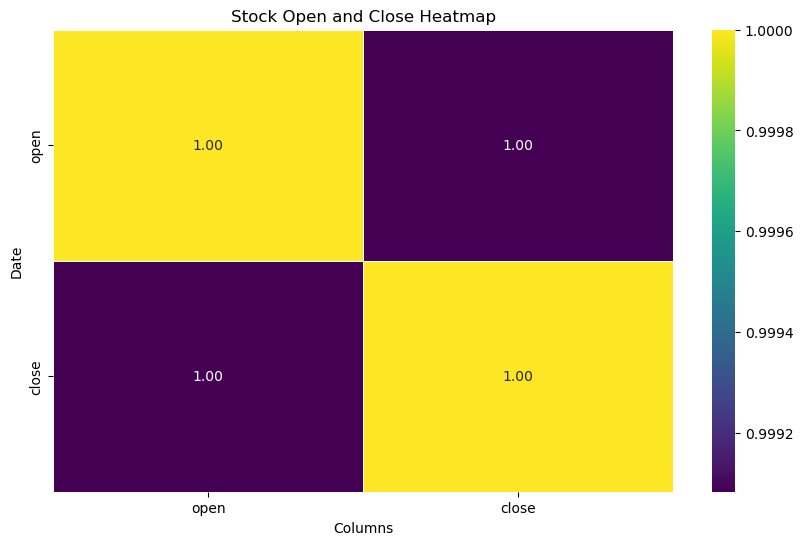

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already read the data into the variable df
df = df.assign(date=lambda x: pd.to_datetime(x['date'].str.split().str[0])).set_index('date')[['open', 'close']]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Stock Open and Close Heatmap")
plt.xlabel("Columns")
plt.ylabel("Date")
plt.show()
